Wine perdiction Project


Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data Collection

In [2]:
# Loading teh dataset to a pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [3]:
# Number of Rows and colums in the dataset
wine_dataset.shape

(1599, 12)

In [4]:
# First 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Last 5 rows of the dataset
wine_dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
# Checking for the missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [10]:
# Statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


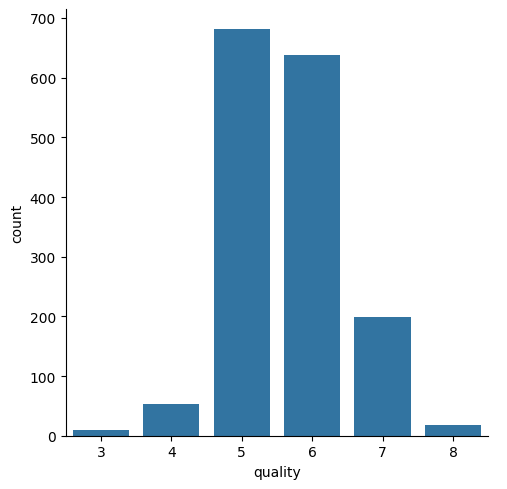

In [12]:
# Number of values for each quality using the seaborn
sns.catplot(x='quality',data= wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

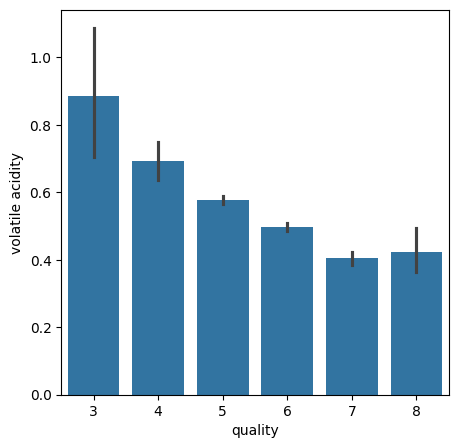

In [15]:
#Compare volatile acidity and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=wine_dataset)

Inferences: If the volatile acidity is high, the quality of wine is poor. Vice versa, if the volatile acidity is low, the quality of the wine is high. So the volatile acidity and quality are inversly proportionel.

<Axes: xlabel='quality', ylabel='citric acid'>

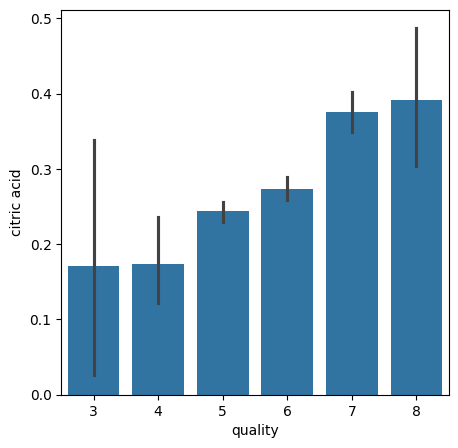

In [18]:
#Compare citric acid and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wine_dataset)

Inferences: It's the opposite of volatile acidity. If the citric acid content is hight, the quality of the wine is high. Vice versa, if the citric acid content is low, the quality of wine is low. So the citric acid value is directly proportionel to the quality


<Axes: xlabel='quality', ylabel='fixed acidity'>

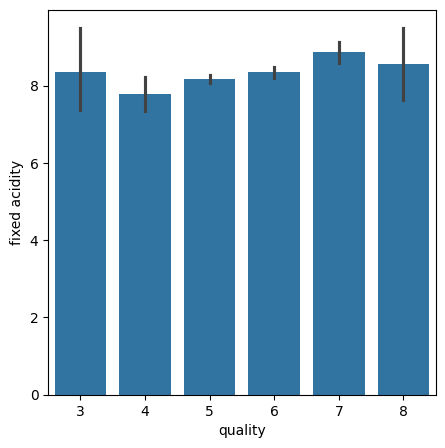

In [20]:
#Compare fixed acidity and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity',data=wine_dataset)

No Inferences found

<Axes: xlabel='quality', ylabel='residual sugar'>

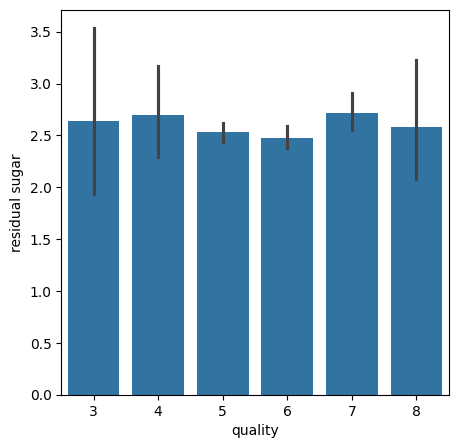

In [22]:
#Compare residual sugar and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar',data=wine_dataset)

No inferences found

<Axes: xlabel='quality', ylabel='chlorides'>

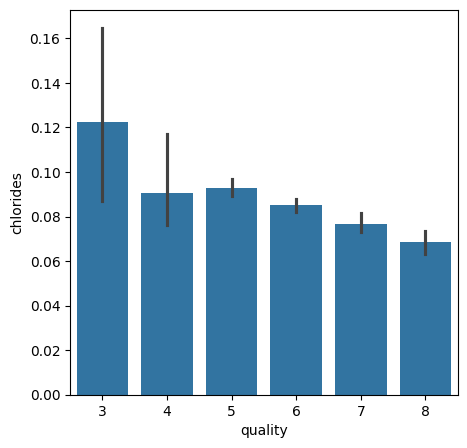

In [24]:
#Compare chlorides and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides',data=wine_dataset)

Inferences: If the chlorides content is high, the quality of the wine is poor. Vice versa, if the chlorides content is low, the quality of wine is high. So the chlorodes value is not directly proportionel to the quality

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

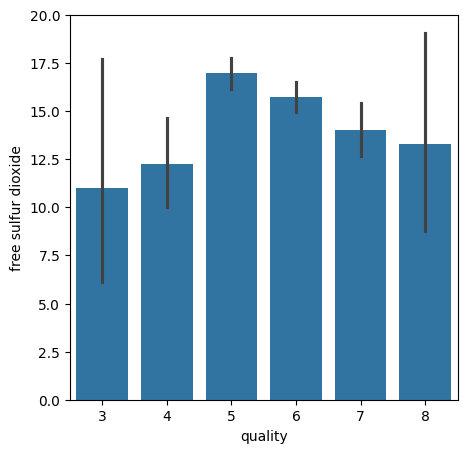

In [28]:
#Compare free sulfur dioxide and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide',data=wine_dataset)

No inferences found

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

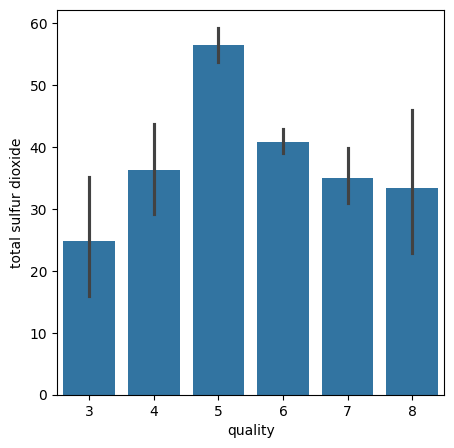

In [29]:
#Compare total sulfur dioxide and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide',data=wine_dataset)

No inferences found

<Axes: xlabel='quality', ylabel='density'>

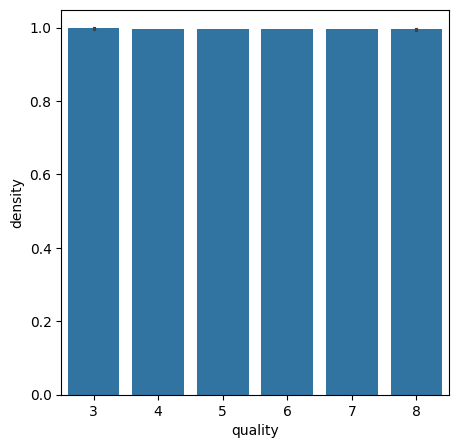

In [31]:
#Compare density and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density',data=wine_dataset)

No inferences found

<Axes: xlabel='quality', ylabel='pH'>

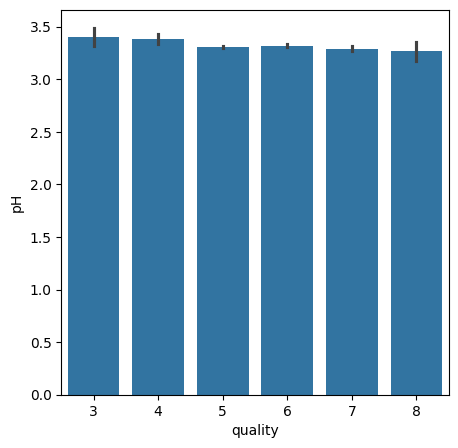

In [33]:
#Compare pH and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH',data=wine_dataset)

No inferences found

<Axes: xlabel='quality', ylabel='sulphates'>

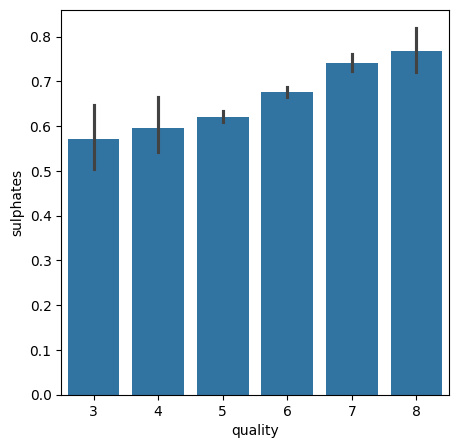

In [35]:
#Compare sulphates and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates',data=wine_dataset)

Inferences: If the sulphates content is high, the quality of the wine is high. Vice versa, if the sulphates content is low, the quality of wine is low. So the sulphates value is directly proportionel to the quality

<Axes: xlabel='quality', ylabel='alcohol'>

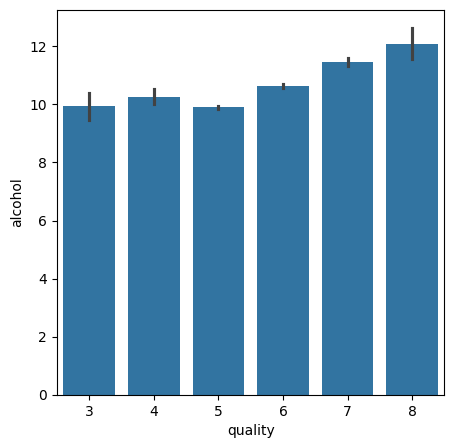

In [36]:
#Compare alcohol and Quality using matplotlib.pyplot
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol',data=wine_dataset)

No inferenecs found

Correlation

1.Postive Correlation (two values are positively correlated, means if one value increases, the other value also increases)
2. Negative Correlation (two values are negatively correlated, means if one value decreases, the other value also decreases)

In [37]:
correlation = wine_dataset.corr()

<Axes: >

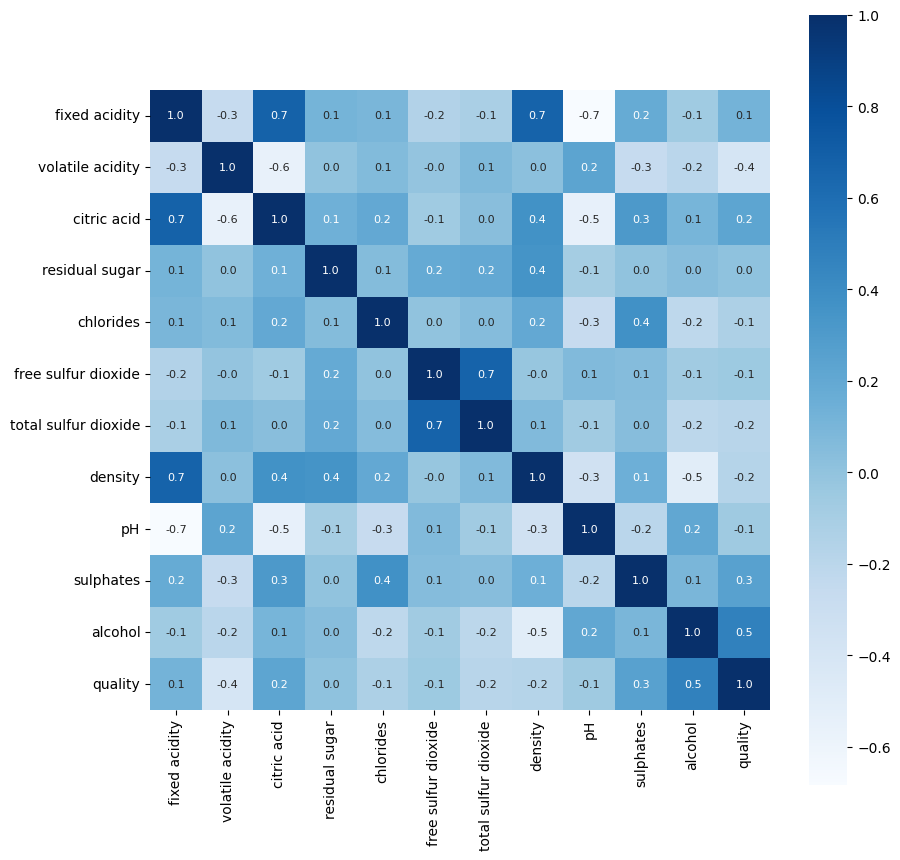

In [38]:
# constructing a heatmap to understand the correlation between the colums
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8}, cmap='Blues')

Data Preprocessing


In [39]:
#Separate the data and Label
X = wine_dataset.drop('quality',axis=1) # dropping the quality column
# axis=0 dropping the record

In [40]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [41]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [42]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Split train & test data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [50]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:

Random Forest Classifier (ensemble models of decision tree)

In [52]:
model = RandomForestClassifier()

In [53]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [54]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('accuracy:', test_data_accuracy)

accuracy: 0.93125


Building a predictive System

In [60]:
input_data = (7.8,0.57,0.31,1.8,0.069,26.0,120.0,0.99625,3.29,0.53,9.3)

# Changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
